# Flight Price Prediction Project


# Importing Neccessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

# Importing dataset


As according to question statement there are two datasets available in problem statement and they are: 1.train 2.test. So, first import train data set and than import test dataset.

Importing train data set as a df1

In [8]:
df1=pd.read_csv("Data_Train.csv")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Type of problem

STATEMENT: Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

So this problem is regression problem finding continous values


In [9]:
df1.shape#shape of data

(10683, 11)

# Detailed description df1

In [10]:
df1.describe()#describe data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

# Datatypes of all columns in df1


In [11]:
df1.dtypes#datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Some columns are having object datatypes :Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info.

and only one column is having integer data type : Price,

Price is a target variable.

# Checking is there any null value in train dataset df1

In [12]:
#check is there any null value present in any column

df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two columns are having missing data in it.

Total_Stops 1

Route 1

# Visualization of null values

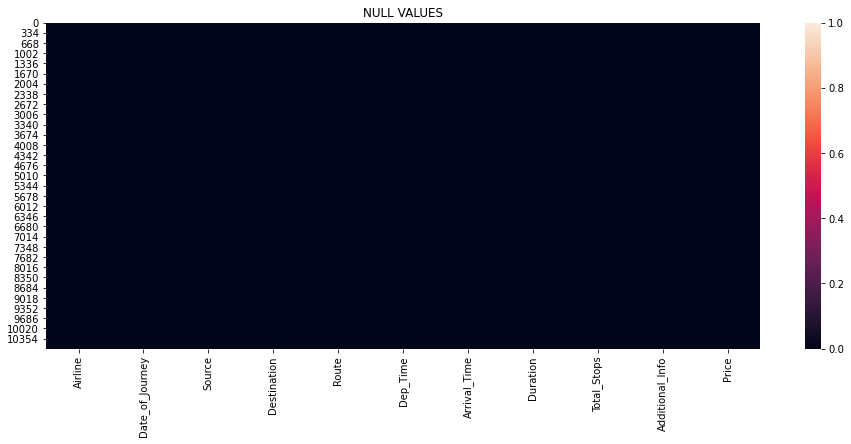

In [13]:
plt.figure(figsize=[16,6])
sn.heatmap(df1.isnull())
plt.title("NULL VALUES")
plt.show()

there is only two columns which are having null value.

# EDA (Exploratory Data Analysis)

# Visualization (Uni Variate analysis)

Uni variate analysis works with only one variable, hence it is called uni variate.

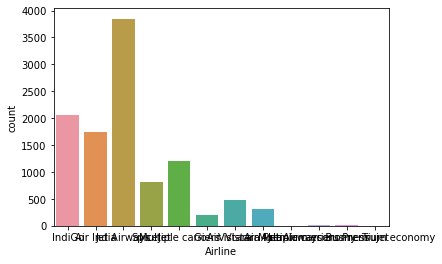

In [14]:
#visualization of variables 
sn.countplot(df1["Airline"])
plt.show()

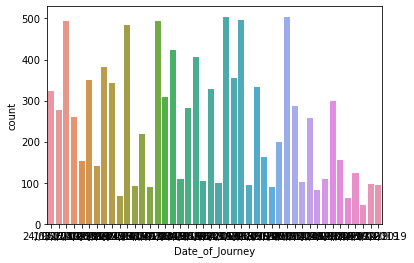

In [15]:
#visualization of variables 
sn.countplot(df1["Date_of_Journey"])
plt.show()

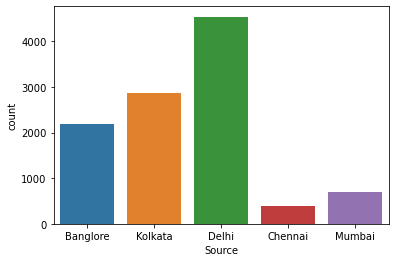

In [16]:
#visualization of variables 
sn.countplot(df1["Source"])
plt.show()

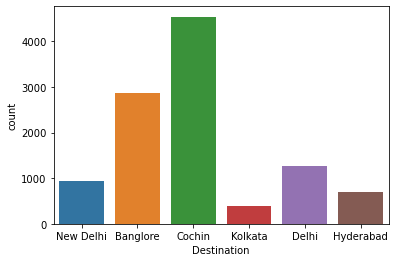

In [17]:
#visualization of variables 
sn.countplot(df1["Destination"])
plt.show()

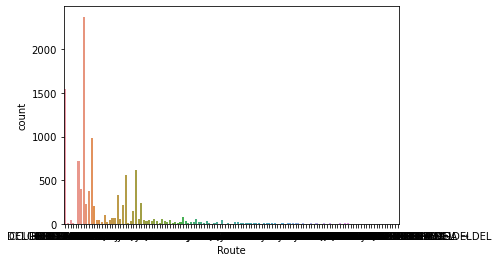

In [18]:
#visualization of variables 
sn.countplot(df1["Route"])
plt.show()


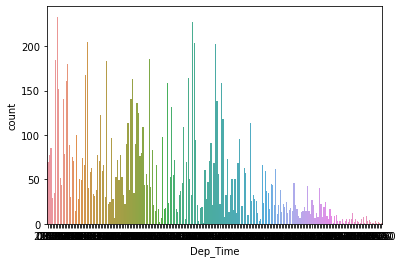

In [19]:
#visualization of variables 
sn.countplot(df1["Dep_Time"])
plt.show()

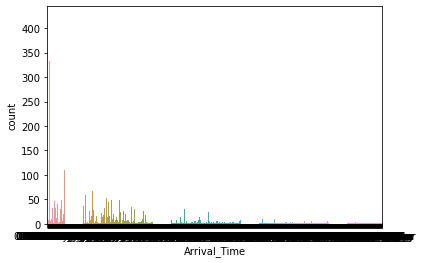

In [20]:
#visualization of variables 
sn.countplot(df1["Arrival_Time"])
plt.show()

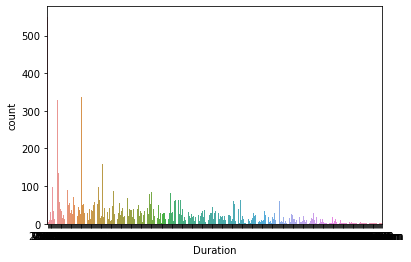

In [21]:
#visualization of variables 
sn.countplot(df1["Duration"])
plt.show()

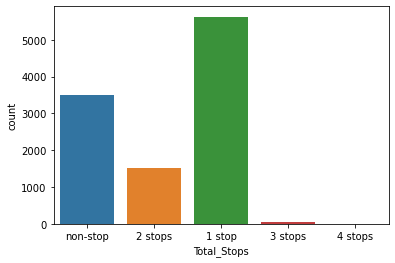

In [22]:
#visualization of variables 
sn.countplot(df1["Total_Stops"])
plt.show()

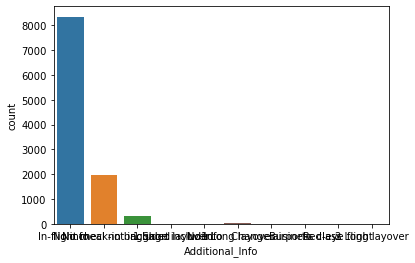

In [23]:
#visualization of variables 
sn.countplot(df1["Additional_Info"])
plt.show()

# Bi variate analysis


Bi variate analysis is works with two variables.

It is not possible inscatter plot to every variable relationship with target variable as it is not in proper form, so drop that column only for bivariate visualization.

In [24]:
fe = df1[["Airline", "Date_of_Journey", "Source", "Destination", "Dep_Time", "Arrival_Time", "Duration", "Additional_Info", "Price"]]

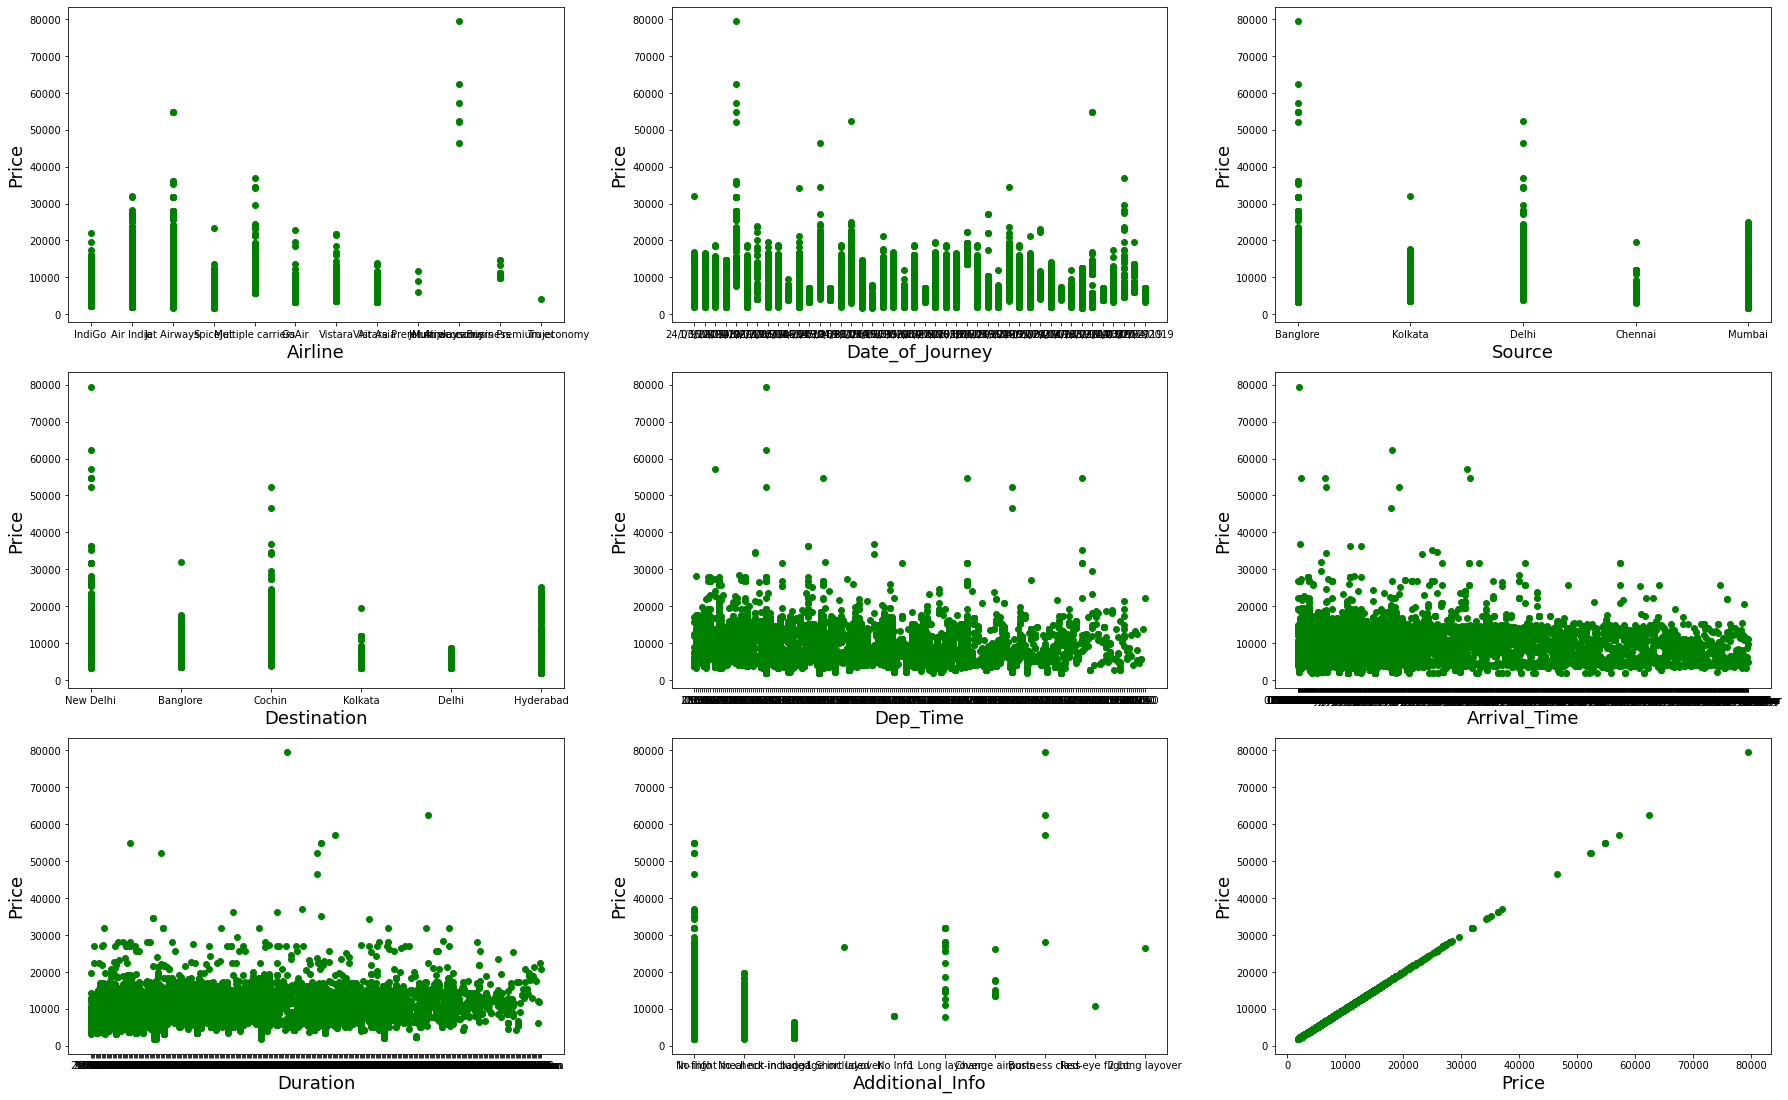

In [25]:
#Relationship Visualizing

plt.figure(figsize = (25,25), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(fe[column],fe['Price'], color='g')
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Price', fontsize=18)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot all input variables are having almost linear relationship with target variable and other variables are having non linear realationship with target variable and outliers are also present in some columns.

# Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

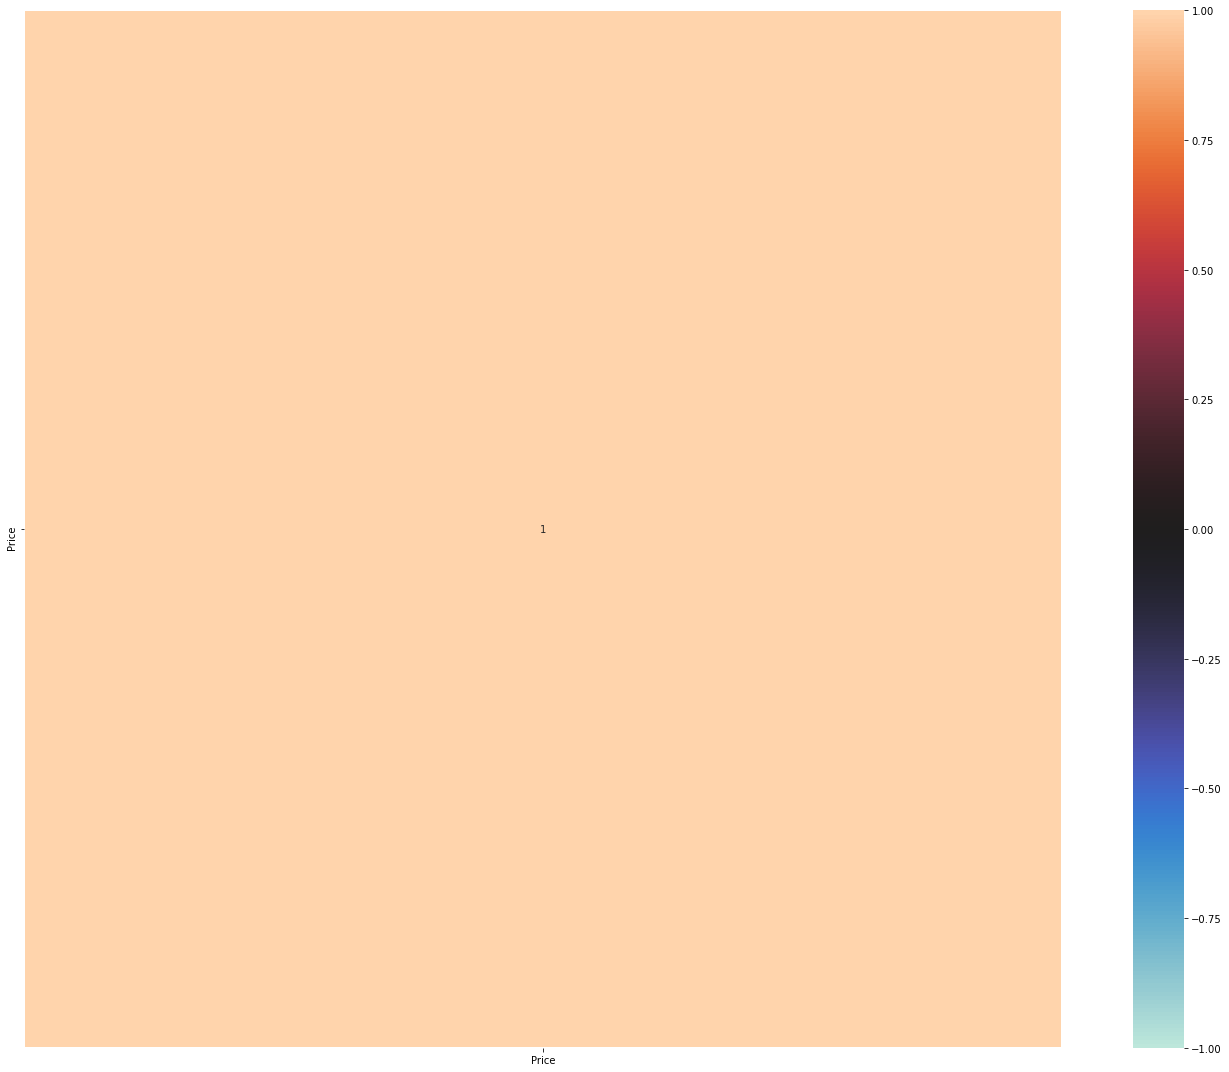

In [26]:
df1_cor = df1.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df1_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap.

After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

# Handling missing values

1.Route
2.Total_Stops

In [27]:
df1['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BOM → JDH → JAI → DEL → HYD             1
BOM → DED → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → RPR → HYD → BLR                   1
Name: Route, Length: 128, dtype: int64

In [28]:
df1['Route']=df1['Route'].fillna(df1['Route'].mode()[0])#fill values with mode of observation

In [29]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
df1['Total_Stops']=df1['Total_Stops'].fillna(df1['Total_Stops'].mode()[0])#fill values with mode of observation

In [31]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

as we see above the null values can fill up with mode.

# Encoding

# 1.Airline

In [32]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [33]:
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# 2. Extract Date_of_Journey column

In [34]:
df1['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [35]:
df1["Date_of_Journey"]=pd.to_datetime(df1["Date_of_Journey"])


In [36]:
df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

we can see the data type of date column change from oject to datetime. Now, we can axtract it.

In [37]:
df1["Journey_Year"] = df1["Date_of_Journey"].dt.year

In [38]:
df1["Journey_Month"] = df1["Date_of_Journey"].dt.month

In [39]:
df1["Journey_day"] = df1["Date_of_Journey"].dt.day

In [40]:
df1["Journey_Year"].unique()

array([2019])

In [41]:
#drop Journey_Year column
df1= df1.drop(['Journey_Year'], axis=1)

In [42]:
#drop Date column
df1=df1.drop(['Date_of_Journey'], axis=1)

In [43]:
df1['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# 3. Destination

In [44]:
df1['Destination'].unique()#unique values

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
df1['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# 4.Route

In [46]:
df1['Route'].value_counts()

DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BOM → JDH → JAI → DEL → HYD             1
BOM → DED → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → RPR → HYD → BLR                   1
Name: Route, Length: 128, dtype: int64

# 5.Extract Dep_Time column

In [47]:
df1['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
22:25      1
04:50      1
03:00      1
01:35      1
Name: Dep_Time, Length: 222, dtype: int64

In [48]:
df1["Dep_Time"]=pd.to_datetime(df1["Dep_Time"])

In [49]:
df1["Dep_Hour"] = df1["Dep_Time"].dt.hour#hour

In [50]:
df1["Dep_Minute"] = df1["Dep_Time"].dt.minute#minute

In [51]:
#drop Dep_Time column
df1=df1.drop(['Dep_Time'], axis=1)

# 6. Arrival_Time

In [52]:
df1['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
08:55 19 Mar      1
12:30 13 Jun      1
03:35 22 May      1
10:50 07 Mar      1
00:50 19 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [54]:
df1["Arrival_Time"]=pd.to_datetime(df1["Arrival_Time"])#convert to datetime

In [55]:
df1["Arrival_Hour"] = df1["Arrival_Time"].dt.hour#hour

In [56]:
df1["Arrival_Minute"] = df1["Arrival_Time"].dt.minute#minute

In [57]:
df1["Arrival_day"] = df1["Arrival_Time"].dt.day#day

In [58]:
df1["Arrival_Month"] = df1["Arrival_Time"].dt.month#month

In [59]:
#drop Arrival_Time column
df1=df1.drop(['Arrival_Time'], axis=1)

In [60]:
df1=df1.drop(['Arrival_day'], axis=1)#drop this column

In [61]:
df1=df1.drop(['Arrival_Month'], axis=1)#drop this column

# 7. Duration

In [62]:
df1['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 45m      1
33h 20m      1
42h 45m      1
37h 10m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# 8. Total_Stops

In [63]:
df1['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# 9. Additional_Info

In [64]:
df1['Additional_Info'].value_counts()#valuecounts

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [65]:
df1= df1.drop(['Additional_Info'], axis=1)# dropping this column as doesn't affect to target column

# Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

In [68]:
df1.dtypes #datatypes

Airline           int64
Source            int64
Destination       int64
Route             int64
Duration          int64
Total_Stops       int64
Price             int64
Journey_Month     int64
Journey_day       int64
Dep_Hour          int64
Dep_Minute        int64
Arrival_Hour      int64
Arrival_Minute    int64
dtype: object

after encoding we can see there is no object datatypes present in whole dataset

# Finding relation between input and target variables

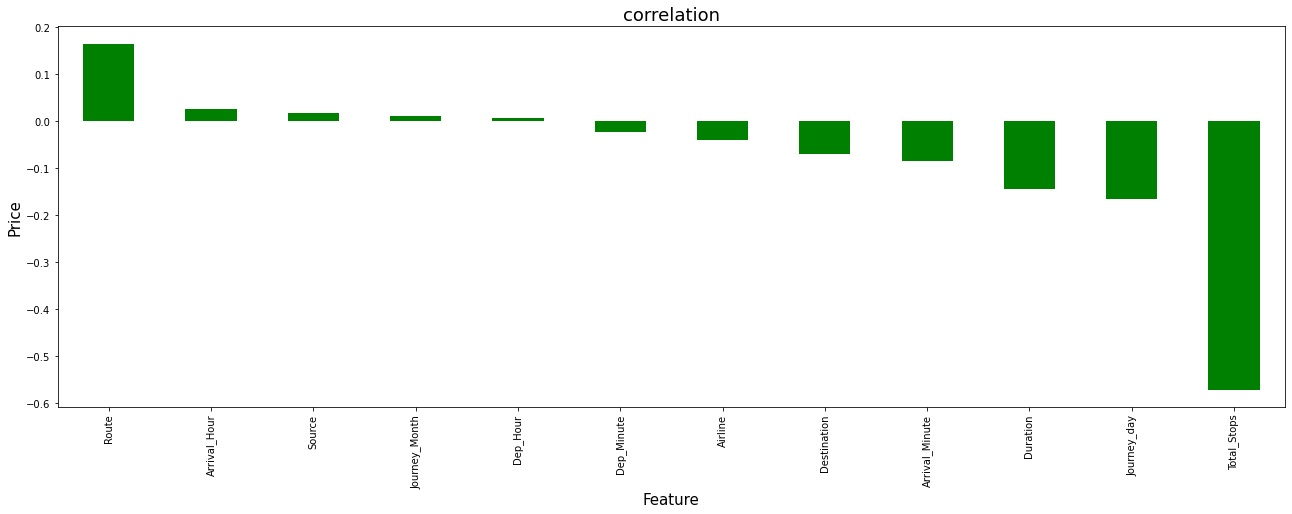

In [69]:
plt.figure(figsize=(22,7))
df1.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

# Remove outliers

Now check the outliers and skewness is present in variables

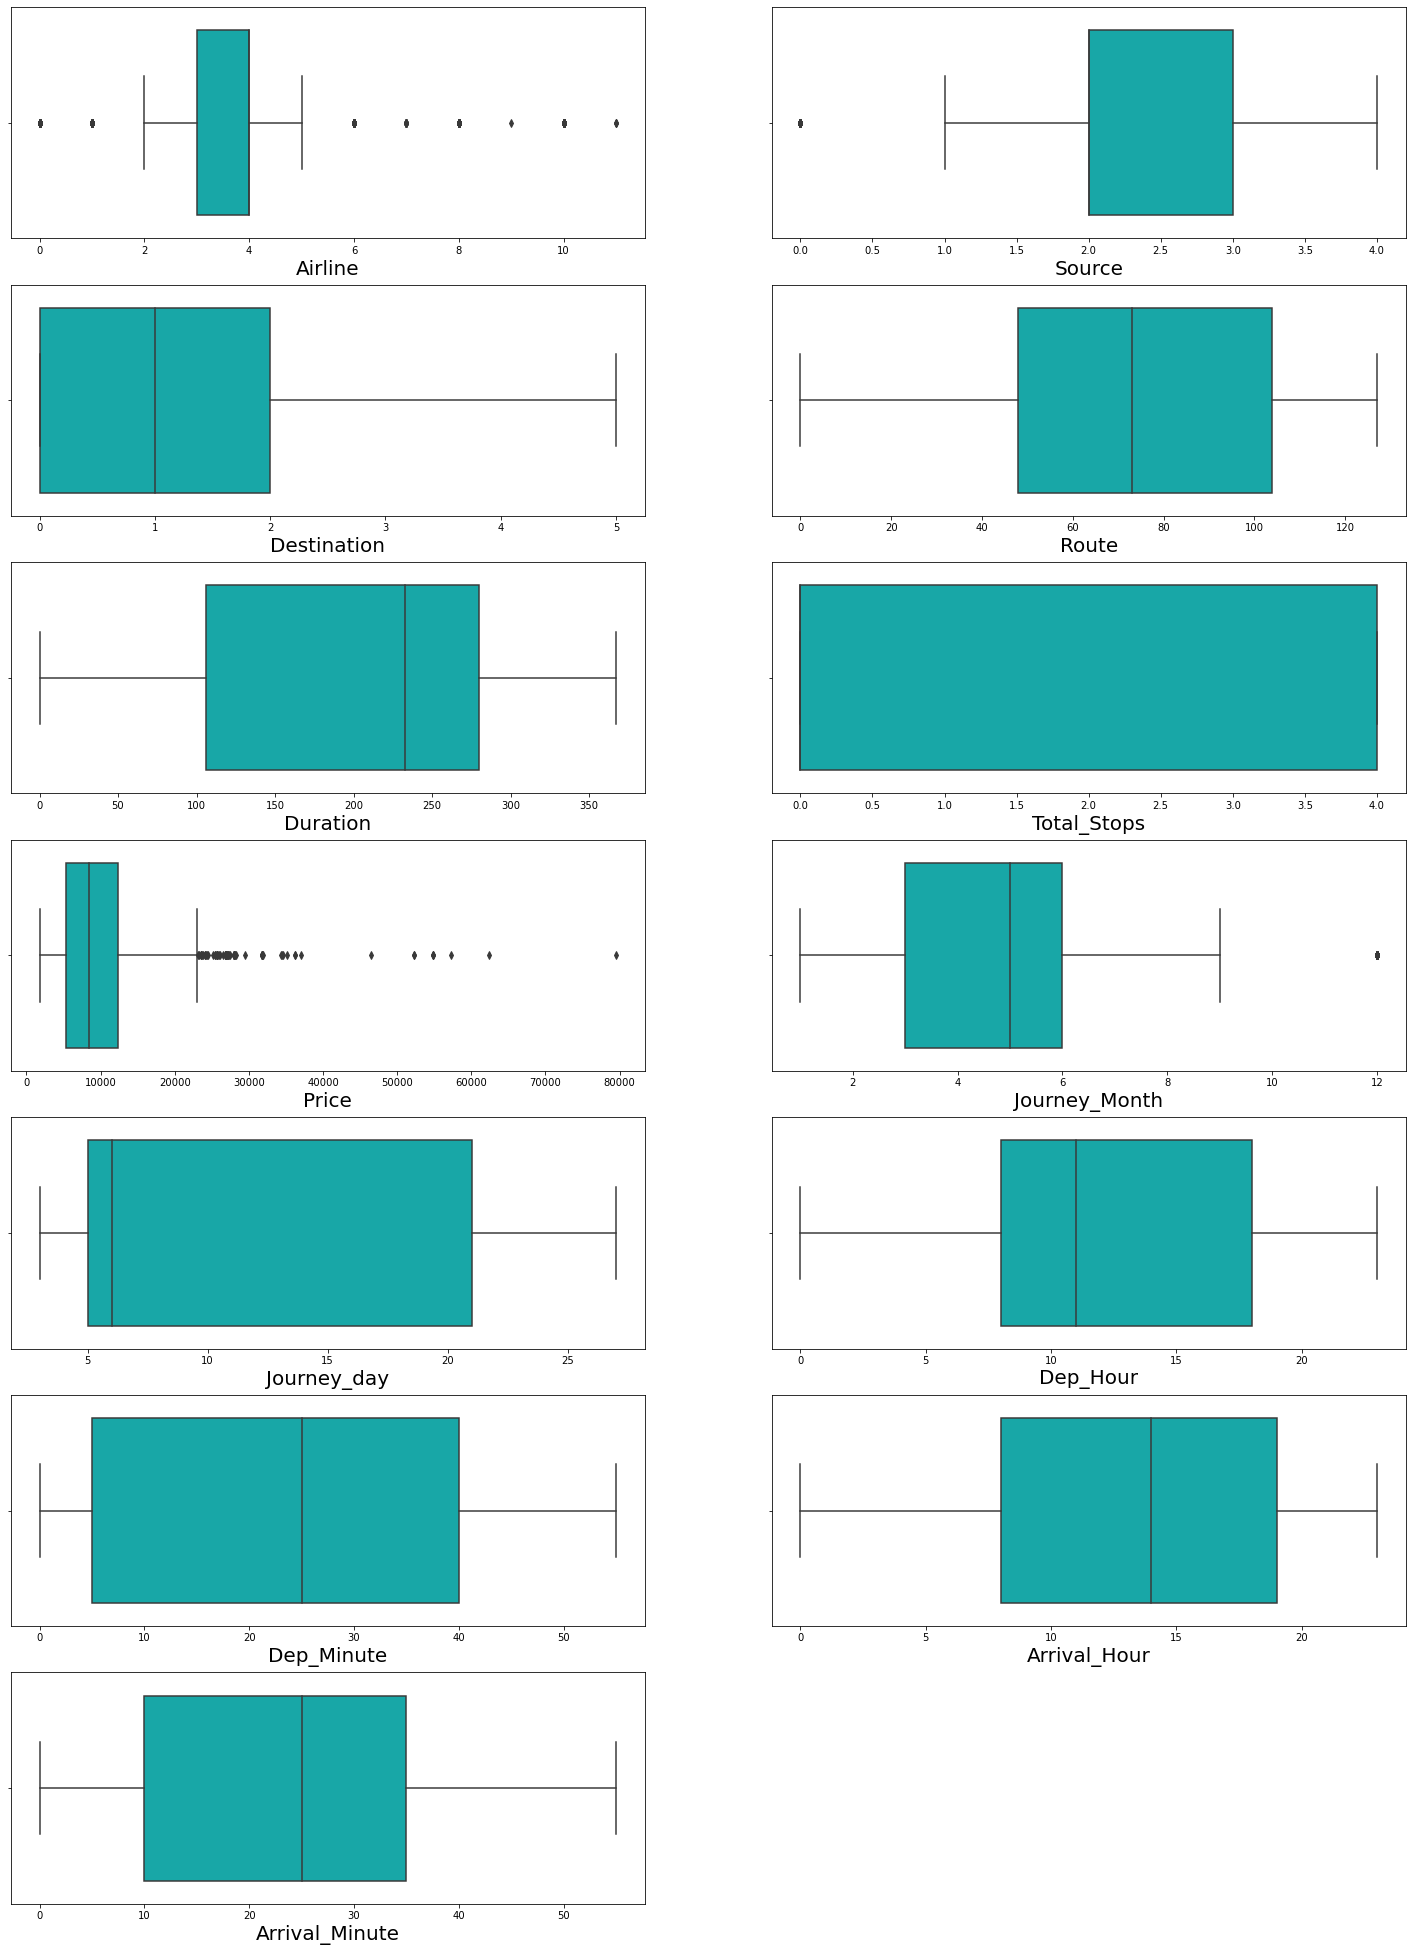

In [70]:
plt.figure(figsize=(25,40))
graph = 1

for column in df1:
    if graph <= 30:
        ax = plt.subplot(8,2, graph)
        sn.boxplot(df1[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

as we can see above there is no outliers present in some columns but that columns are catogorical in nature. so, no need to remove outliers from that. We need to remove outliers from only contineous data.


# Check the skewness and remove that

In [71]:
df1.skew()#skewness

Airline           0.731095
Source           -0.424054
Destination       1.244169
Route            -0.502066
Duration         -0.213427
Total_Stops       0.631681
Price             1.812552
Journey_Month     0.629540
Journey_day       0.367373
Dep_Hour          0.113073
Dep_Minute        0.167029
Arrival_Hour     -0.369988
Arrival_Minute    0.110945
dtype: float64

as we can see above there is no skwness present in some columns but that columns are catogorical in nature. so, no need to remove skewness from that. We need to remove skewness from only contineous data.

# Now work on data set 2

# 2. Test Dataset

In [72]:
#Importing test data set as a test_df

#Import the dataset
df2=pd.read_csv("Test_set.csv")
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Detailed description df2

In [73]:
df2.describe()#describe of data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

# Datatypes of all columns in df2

In [74]:
df2.dtypes#datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns are having object datatypes :"Airline", "Date_of_Journey", "Source", "Destination", 'Route", "Dep_Time", "Arrival_Time", "Duration", "Total_Stops", "Additional_Info

# Check is there any null value in test dataset df2

In [75]:
#check is there any null value present in any column

df2.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values present in whole dataset.

# EDA (Exploratory Data Analysis)


Visualization (Uni Variate analysis)¶

1. Countplot

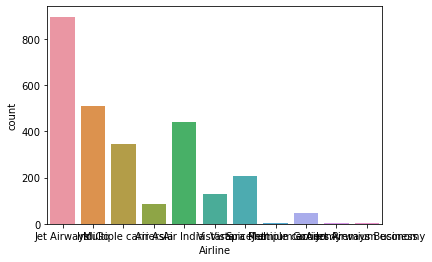

In [76]:
#visualization of variables 
sn.countplot(df2["Airline"])
plt.show()

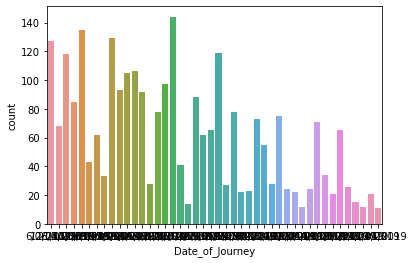

In [77]:
#visualization of variables 
sn.countplot(df2["Date_of_Journey"])
plt.show()

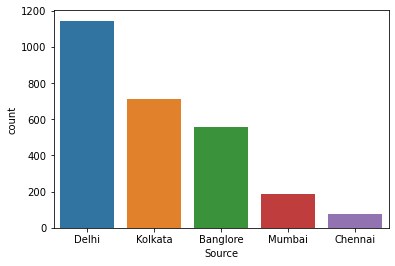

In [78]:
#visualization of variables 
sn.countplot(df2["Source"])
plt.show()

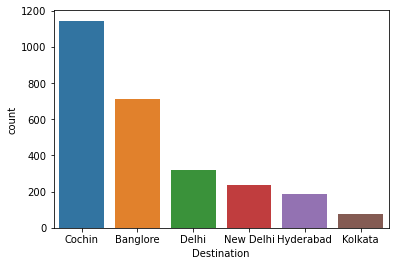

In [79]:
#visualization of variables 
sn.countplot(df2["Destination"])
plt.show()

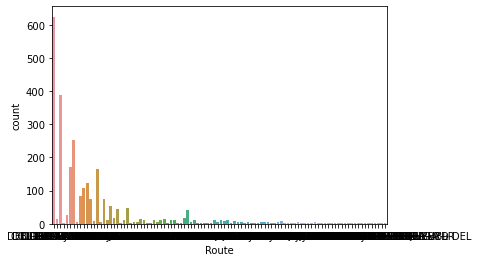

In [80]:
#visualization of variables 
sn.countplot(df2["Route"])
plt.show()

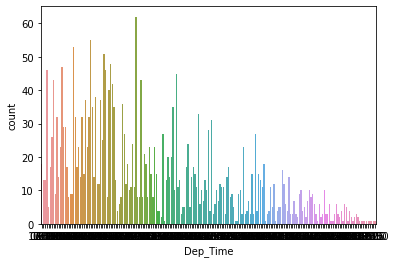

In [81]:
#visualization of variables 
sn.countplot(df2["Dep_Time"])
plt.show()

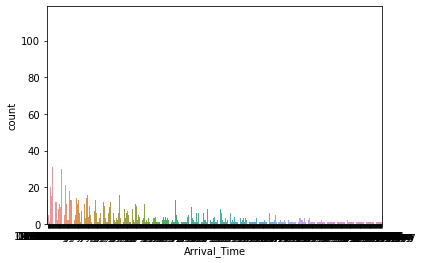

In [82]:
#visualization of variables 
sn.countplot(df2["Arrival_Time"])
plt.show()

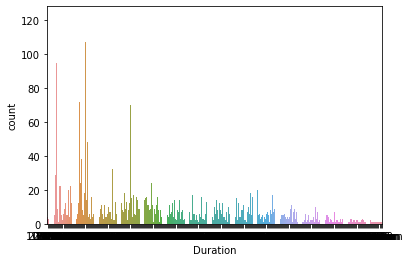

In [83]:
#visualization of variables 
sn.countplot(df2["Duration"])
plt.show()

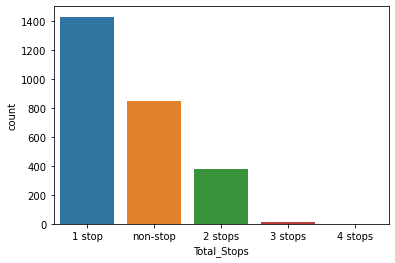

In [84]:
#visualization of variables 
sn.countplot(df2["Total_Stops"])
plt.show()

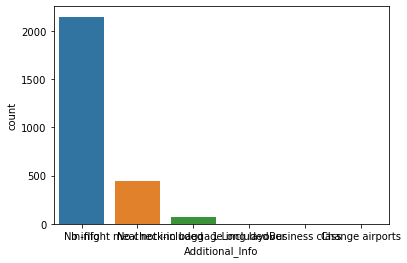

In [85]:
#visualization of variables 
sn.countplot(df2["Additional_Info"])
plt.show()

In [86]:
df2.head()#top 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Encoding, Droping and Missing data handling

# 1. Airline'

In [87]:
df2['Airline'].unique() #chking unique value

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [88]:
df2['Airline'].value_counts()#value counts

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

# 2. Extract the Date_of_Journey column


In [89]:
df2['Date_of_Journey'].unique()

array(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
      dtype=object)

In [90]:
df2["Date_of_Journey"]=pd.to_datetime(df2["Date_of_Journey"])

In [91]:
df2["Journey_Year"] = df2["Date_of_Journey"].dt.year

In [92]:
df2["Journey_Month"] = df2["Date_of_Journey"].dt.month

In [93]:
df2["Journey_day"] = df2["Date_of_Journey"].dt.day

In [94]:
df2["Journey_Year"].unique()

array([2019])

In [95]:
#drop Journey_Year column
df2=df2.drop(['Journey_Year'], axis=1)

In [96]:
#drop Date column
df2=df2.drop(['Date_of_Journey'], axis=1)

# 3.Source

In [97]:
df2['Source'].unique() #unique values

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [98]:
df2['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

# 4.Destination

In [99]:
df2['Destination'].unique()#chking unique values

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [100]:
df2['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

# 5.Route

In [101]:
df2['Route'].value_counts()#value counts for route

DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BLR → VGA → DEL            1
CCU → BOM → TRV → BLR      1
BLR → BOM → UDR → DEL      1
CCU → BBI → HYD → BLR      1
BOM → GOI → HYD            1
Name: Route, Length: 100, dtype: int64

# 6.Extract Dep_Time column

In [102]:
df2['Dep_Time'].unique()#chking unique values

array(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:

In [103]:
df2['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
15:40     1
12:10     1
16:35     1
23:00     1
10:25     1
Name: Dep_Time, Length: 199, dtype: int64

In [104]:
df2["Dep_Time"]=pd.to_datetime(df2["Dep_Time"])#convert to datetime

In [105]:
df2["Dep_Hour"] = df2["Dep_Time"].dt.hour #hour

In [106]:
df2["Dep_Minute"] = df2["Dep_Time"].dt.minute#minute

In [107]:
#drop Dep_Time column
df2=df2.drop(['Dep_Time'], axis=1)

# 7. Extract Arrival_Time column

In [108]:
df2['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
08:55 19 May      1
16:25             1
00:05 02 May      1
18:00 25 May      1
01:20 22 May      1
Name: Arrival_Time, Length: 704, dtype: int64

In [109]:
df2["Arrival_Time"]=pd.to_datetime(df2["Arrival_Time"])#convert to datetime

In [110]:
df2["Arrival_Hour"] = df2["Arrival_Time"].dt.hour#to hour

In [111]:
df2["Arrival_Minute"] = df2["Arrival_Time"].dt.minute#to minute

In [112]:
df2["Arrival_day"] = df2["Arrival_Time"].dt.day

In [113]:
df2["Arrival_Month"] = df2["Arrival_Time"].dt.month

In [114]:
#drop Arrival_Time column
df2=df2.drop(['Arrival_Time'], axis=1)

In [115]:
df2=df2.drop(['Arrival_day'], axis=1)#drop this column

In [116]:
df2=df2.drop(['Arrival_Month'], axis=1)#drop this column

# 8.Duration

In [117]:
df2['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
27h 55m      1
19h 15m      1
34h 30m      1
4h 10m       1
22h 40m      1
Name: Duration, Length: 320, dtype: int64

# 9. Total_Stops

In [118]:
df2['Total_Stops'].value_counts()#value counts for total stops

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

# 10.Additional_Info

In [119]:
df2['Additional_Info'].value_counts()#value counts for additional info

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [120]:
df2= df2.drop(['Additional_Info'], axis=1)#drop the column

# Label encoder

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [122]:
for i in df2.columns:
    if df2[i].dtypes=="object":
        df2[i]=le.fit_transform(df2[i].values.reshape(-1,1))


In [123]:
df2.dtypes #chking datatypes again

Airline           int64
Source            int64
Destination       int64
Route             int64
Duration          int64
Total_Stops       int64
Journey_Month     int64
Journey_day       int64
Dep_Hour          int64
Dep_Minute        int64
Arrival_Hour      int64
Arrival_Minute    int64
dtype: object

# Remove outliers

Now we found the outliers and skewness in some variables.Removing outliers first.

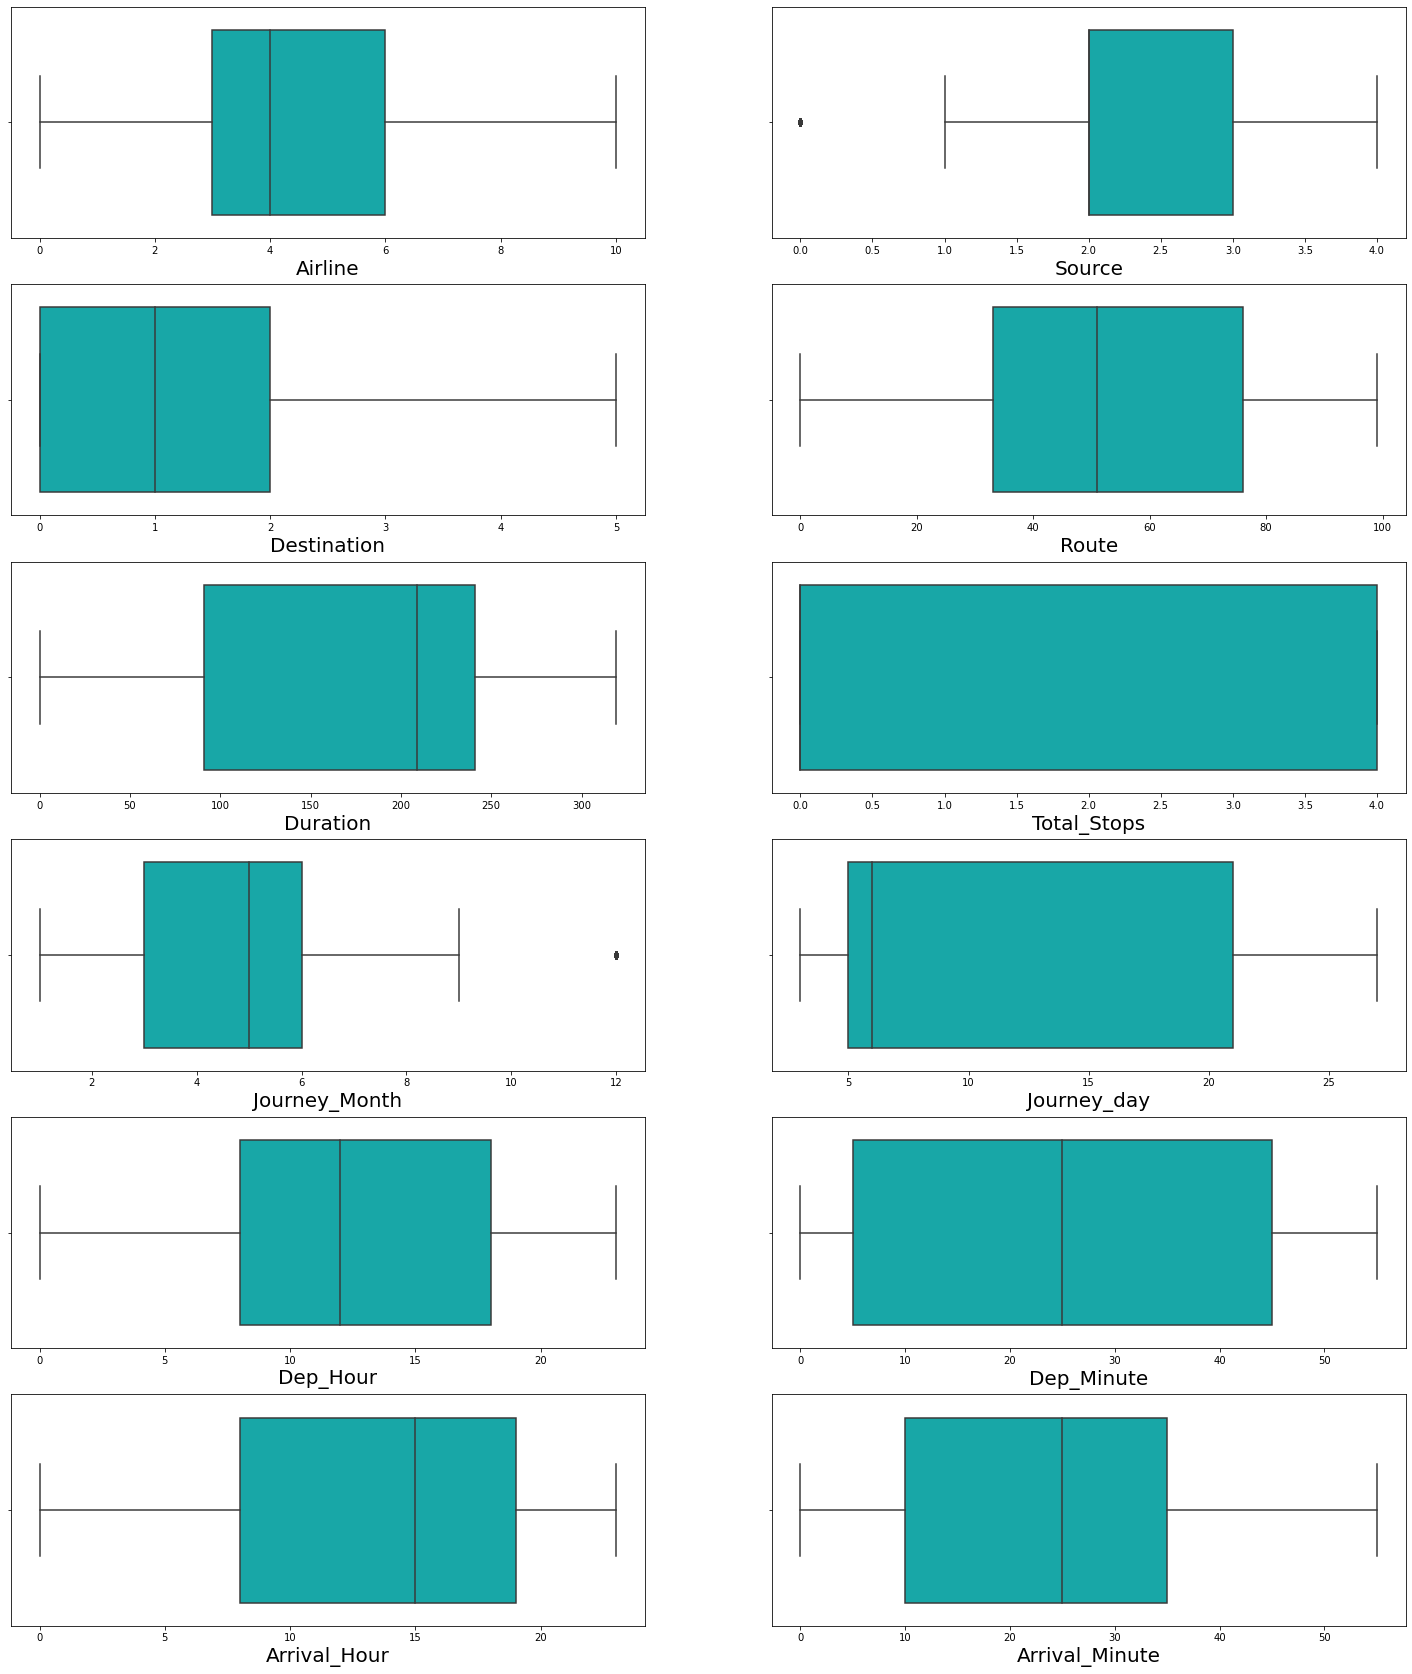

In [124]:
plt.figure(figsize=(25,40))
graph = 1

for column in df2:
    if graph <= 30:
        ax = plt.subplot(8,2, graph)
        sn.boxplot(df2[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

as we can see above there is no outliers present in some columns but that columns are catogorical in nature. so, no need to remove outliers from that. We need to remove outliers from only contineous data.


# Check the skewness and remove that

In [125]:
df2.skew()#skewness

Airline           0.483882
Source           -0.424997
Destination       1.263630
Route            -0.281807
Duration         -0.275404
Total_Stops       0.672623
Journey_Month     0.590701
Journey_day       0.478246
Dep_Hour          0.093759
Dep_Minute        0.128515
Arrival_Hour     -0.443166
Arrival_Minute    0.115267
dtype: float64

as we can see above there is no skwness present in some columns but that columns are catogorical in nature. so, no need to remove skewness from that. We need to remove skewness from only contineous data.


# Seprating the columns into featuers and target:

x= features, y=Target

In [126]:
x = df1.drop(columns = 'Price', axis=1)
y = df1['Price']
x1 = df2

# Scalling technique

In [127]:
from sklearn.preprocessing import StandardScaler #Standard scalar

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [128]:
x1_scalar = ss.fit_transform(x1)

test dataset and train dataset are scalled now

# Variance inflation factor

In [129]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif


,vif,Features
0,1.015788,Airline
1,1.701712,Source
2,1.835565,Destination
3,1.564508,Route
4,1.098279,Duration
5,1.362189,Total_Stops
6,1.095631,Journey_Month
7,1.104480,Journey_day
8,1.028923,Dep_Hour
9,1.026364,Dep_Minute


In [130]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif["Features"] = x1.columns

#lets check the values
vif

,vif,Features
0,1.020441,Airline
1,1.616695,Source
2,1.836204,Destination
3,1.540408,Route
4,1.116116,Duration
5,1.393231,Total_Stops
6,1.088962,Journey_Month
7,1.095957,Journey_day
8,1.046671,Dep_Hour
9,1.034761,Dep_Minute


as we have saw in the table vif value is not greater than 5. so no need to drop any column to avoid multiclinearity issue.

# Finding best random state


In [131]:
from sklearn.model_selection import train_test_split #importing library for finding random state
from sklearn.metrics import r2_score

In [132]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.770093626710178 on Random_state  58


In [133]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 58) #putting best random state

# 1.Linear Regression Model

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [135]:
pred_test=Lr.predict(x_test)

In [136]:
print(r2_score(y_test,pred_test))

0.3664295134756216


# Cross Validation of Linear Regression

In [137]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.37014052451672913

The Accuracy score for Linear regression model is : 36%
Cross validation score for Linear regression is : 37%


# Regularization

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [139]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.366397951385081

# 2.Random forest regression

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
Rfr= RandomForestRegressor()
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  80.88500084814076
Cross Val Score:  79.27271409351985


The r2 score for Random Forest Regressor model is : 81.46%

Cross validation score for Random Forest Regressor is : 79.12%

# 3. Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [142]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.7160998513187036


In [143]:
cv_score= cross_val_score(dtree, x, y, cv=3, scoring='r2')
cv_mean=cv_score.mean()
cv_mean

0.6792703114290424

The r2 score for Decision tree regression model is : 71.60%

Cross validation score for Decision tree regression is : 67.92%

# 4.KNN:

In [164]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [167]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6806691401350142
mean_squared_error: 7334995.328572766
mean_absolute_error: 1710.087693027609
root_mean_squared_error: 2708.319650368613


KNN is giving me 68.06% r2_score.

In [169]:
print(cross_val_score(knn,x,y,cv=5).mean()) #cross validation score

0.6022617795554963


By comparing all models we can see that random forest regressor is having low difference so take this model for hyperparameter tuning

In [ ]:
# Hyperparameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','poisson'],
           'n_estimators':[100],
           'bootstrap':[True],
           'max_depth':[2,6],
           'min_samples_split':[2,3]}
grid=GridSearchCV(estimator=Rfr, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'poisson'],
                         'max_depth': [2, 6], 'min_samples_split': [2, 3],
                         'n_estimators': [100]})

In [171]:
best_parameters=grid.best_params_
print(best_parameters)# printing the best parameters found by GridSearchCV

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100}


In [ ]:
mod = RandomForestRegressor( criterion='poisson', max_depth=6, n_estimators= 700,bootstrap= True,min_samples_split=3)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

Hay thus we got 85% accuracy of our model..

# Saving the model:

In [179]:
# Saving the model using .pkl
import joblib
joblib.dump(mod,"Flight_Price.pkl")


['Flight_Price.pkl']

# Loding model

In [182]:
# Loading the saved model
model=joblib.dump(mod,"Flight_Price.pkl")

#Prediction
prediction = mod.predict(x_test)
prediction

array([8470.65202722, 8470.65202722, 8467.11423688, ..., 8470.65202722,
       8470.65202722, 8470.65202722])

In [184]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [185]:
prediction.to_csv('FlightPricePredictionResults.csv', index = False)
#prediction saving

Model Saved